In [1]:
# import

from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
# import torch.functional as F
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
from tqdm import tqdm



In [2]:
# Transforms

train_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,))
                                       ])

test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,),(0.3081,))
                                      ])


In [3]:
# download data
train = datasets.MNIST('./data',train=True,transform=train_transforms, download=True)
test = datasets.MNIST('./data',train=False, transform =test_transforms, download=True)

In [4]:
# Data loader
SEED=1
cuda = torch.cuda.is_available()

# torch.manual_seed(SEED)

# if cuda:
#   torch.cuda.manual_seed(SEED)

torch.cuda.manual_seed(SEED) if cuda else torch.manual_seed(SEED)

dataloader_args=dict(shuffle=True,batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# Train loader
train_loader = torch.utils.data.DataLoader(train,**dataloader_args)
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)


# Visualize Data

torch.Size([128, 1, 28, 28]) torch.Size([1, 28, 28])
(28, 28)


Text(0.5, 1.0, '5')

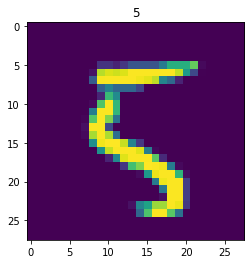

In [5]:
# Visualize Data

dataiter = iter(train_loader)
images,labels = dataiter.next()

print(images.shape, images[0].shape)

print(images[0].numpy().squeeze().shape) # squeeze removes the channel value. 
%matplotlib inline
plt.imshow(images[0].numpy().squeeze())
plt.title(labels[0].item()) #item converts from tensor to value

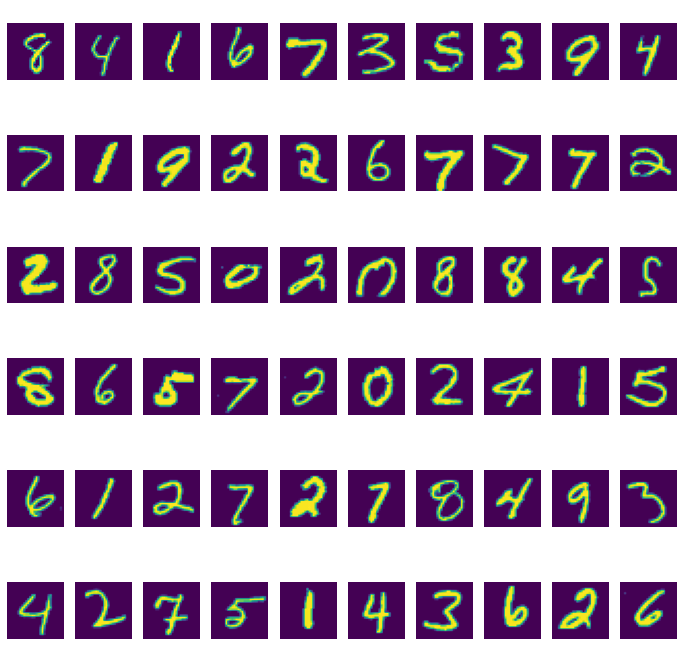

In [6]:
# visualize data in grid format

figure = plt.figure(figsize=(12,12))
num_of_images = 60

for index in range(1, num_of_images+1):
  plt.subplot(6,10,index)
  plt.axis('off')
  plt.imshow(images[index].numpy().squeeze())
  plt.title(labels[index].item(),color='w')

# MODULAR

# Main

In [7]:
# load Google Driver
from google.colab import drive
import sys, os
drive.mount('/content/drive')

my_path = '/content/drive/My Drive/Computer Vision/Extensive VisionAI (EVA5)/06_Regularization & Modular Coding'
sys.path.append(my_path)
os.listdir(my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['01_MNIST - Baseline.ipynb',
 '03_Modular_trial.ipynb',
 '03_Modular_FINAL.ipynb',
 '04_Modular+regularization_FINAL.ipynb',
 '02_visualize_misclassified.ipynb',
 '05_Modular+GBN_FINAL.ipynb',
 'outputs',
 'VS_NET.py',
 '06_Modular_Main.ipynb',
 '__pycache__',
 'Test_Train.py',
 'Plots.py']

In [8]:
# import for all the modular codes
import VS_NET
import Test_Train
import Plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# ARchitecture View
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = VS_NET.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           1,440
      BatchNorm2d-10           [-1, 16, 22, 22]              32
             ReLU-11           [-1, 16, 22, 22]               0
          Dropout-12           [-1, 16, 22, 22]               0
        MaxPool2d-13           [-1, 16, 11, 11]               0
           Conv2d-14           [-1, 10,

In [10]:
from torch.optim.lr_scheduler import StepLR

model =  VS_NET.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.05)

metric_values = {}
models={}
EPOCHS = 10



## No Regularizaiton

In [11]:
exp_name = 'no-l1 & l2'

trainer = Test_Train.Trainer(model,device,train_loader,test_loader,optimizer,EPOCHS,scheduler)
train_metric, test_metric = trainer.train(l1_lambda=0, l2_lambda=0)

# save the metrics in dictionary

metric_values[exp_name] = (train_metric, test_metric)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0
learning rate  [0.01]


Loss=0.08144514262676239 Batch_id=468 Accuracy=88.52: 100%|██████████| 469/469 [00:19<00:00, 23.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0857, Accuracy: 9749/10000 (97.49%)

EPOCH: 1
learning rate  [0.01]


Loss=0.026267841458320618 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:19<00:00, 23.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0452, Accuracy: 9870/10000 (98.70%)

EPOCH: 2
learning rate  [0.01]


Loss=0.03140823170542717 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:19<00:00, 24.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0349, Accuracy: 9900/10000 (99.00%)

EPOCH: 3
learning rate  [0.01]


Loss=0.059952422976493835 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:19<00:00, 24.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9896/10000 (98.96%)

EPOCH: 4
learning rate  [0.01]


Loss=0.02008785866200924 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:20<00:00, 22.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9912/10000 (99.12%)

EPOCH: 5
learning rate  [0.01]


Loss=0.03995975852012634 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:19<00:00, 23.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0283, Accuracy: 9913/10000 (99.13%)

EPOCH: 6
learning rate  [2.5e-05]


Loss=0.007983171381056309 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:19<00:00, 23.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9926/10000 (99.26%)

EPOCH: 7
learning rate  [0.0005]


Loss=0.02441726066172123 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:19<00:00, 23.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9935/10000 (99.35%)

EPOCH: 8
learning rate  [0.0005]


Loss=0.016774890944361687 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:19<00:00, 23.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9934/10000 (99.34%)

EPOCH: 9
learning rate  [0.0005]


Loss=0.04298520088195801 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:19<00:00, 23.62it/s]



Test set: Average loss: 0.0219, Accuracy: 9934/10000 (99.34%)



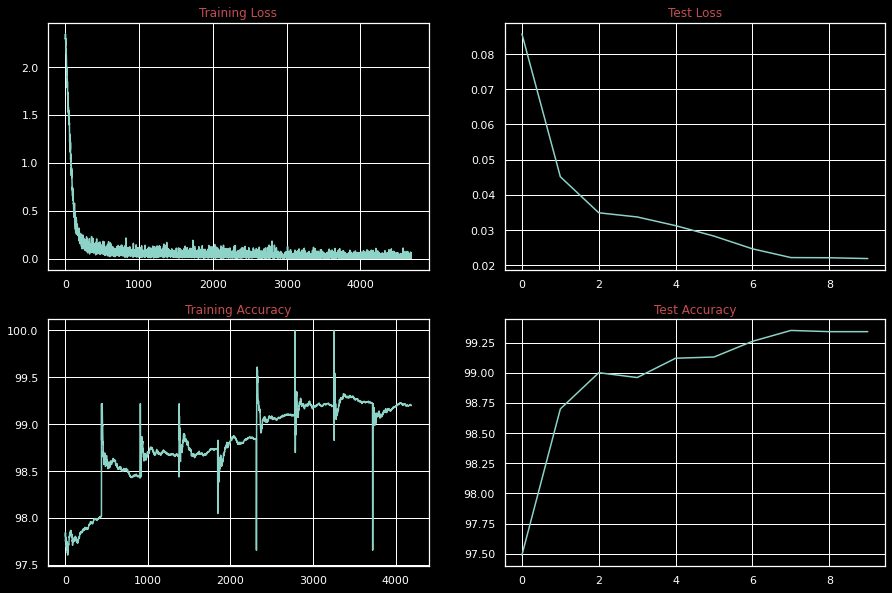

In [12]:
Plots.plot_metrics(train_metric, test_metric)

## L1 Regularization

In [14]:

exp_name = 'Only l1'

trainer = Test_Train.Trainer(model,device,train_loader,test_loader,optimizer,EPOCHS,scheduler)
train_metric, test_metric = trainer.train(l1_lambda=5e-4, l2_lambda=0)

# save the metrics in dictionary

metric_values[exp_name] = (train_metric, test_metric)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0
learning rate  [0.0005]


Loss=0.37922608852386475 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:19<00:00, 23.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9934/10000 (99.34%)

EPOCH: 1
learning rate  [0.0005]


Loss=0.41256406903266907 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:20<00:00, 23.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9930/10000 (99.30%)

EPOCH: 2
learning rate  [1.25e-06]


Loss=0.38828861713409424 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:19<00:00, 23.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9936/10000 (99.36%)

EPOCH: 3
learning rate  [2.5e-05]


Loss=0.39869025349617004 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:19<00:00, 23.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9930/10000 (99.30%)

EPOCH: 4
learning rate  [2.5e-05]


Loss=0.37106603384017944 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:19<00:00, 23.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9931/10000 (99.31%)

EPOCH: 5
learning rate  [2.5e-05]


Loss=0.4057135283946991 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:20<00:00, 23.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9934/10000 (99.34%)

EPOCH: 6
learning rate  [2.5e-05]


Loss=0.44853198528289795 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:19<00:00, 23.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9931/10000 (99.31%)

EPOCH: 7
learning rate  [2.5e-05]


Loss=0.37414857745170593 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:19<00:00, 23.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9936/10000 (99.36%)

EPOCH: 8
learning rate  [6.250000000000001e-08]


Loss=0.3826097249984741 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:20<00:00, 23.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9930/10000 (99.30%)

EPOCH: 9
learning rate  [1.25e-06]


Loss=0.42110511660575867 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:19<00:00, 23.69it/s]



Test set: Average loss: 0.0220, Accuracy: 9932/10000 (99.32%)



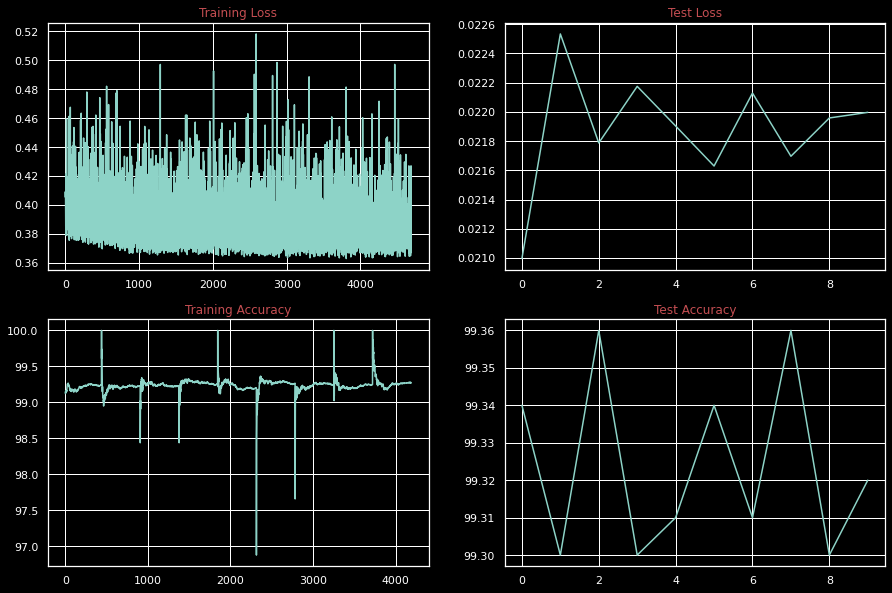

In [15]:
Plots.plot_metrics(train_metric, test_metric)

In [16]:
# L2 REgularization

exp_name = 'Only l2'

trainer = Test_Train.Trainer(model,device,train_loader,test_loader,optimizer,EPOCHS,scheduler)
train_metric, test_metric = trainer.train(l1_lambda=0, l2_lambda=5e-4)

# save the metrics in dictionary

metric_values[exp_name] = (train_metric, test_metric)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0
learning rate  [1.25e-06]


Loss=0.13182538747787476 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:20<00:00, 22.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9933/10000 (99.33%)

EPOCH: 1
learning rate  [1.25e-06]


Loss=0.1385878324508667 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:19<00:00, 23.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9933/10000 (99.33%)

EPOCH: 2
learning rate  [1.25e-06]


Loss=0.12816685438156128 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:20<00:00, 23.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9930/10000 (99.30%)

EPOCH: 3
learning rate  [1.25e-06]


Loss=0.12442148476839066 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:20<00:00, 22.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9929/10000 (99.29%)

EPOCH: 4
learning rate  [3.1250000000000007e-09]


Loss=0.13166210055351257 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:20<00:00, 22.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

EPOCH: 5
learning rate  [6.250000000000001e-08]


Loss=0.1249585896730423 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:20<00:00, 23.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9937/10000 (99.37%)

EPOCH: 6
learning rate  [6.250000000000001e-08]


Loss=0.13505253195762634 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:20<00:00, 23.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9933/10000 (99.33%)

EPOCH: 7
learning rate  [6.250000000000001e-08]


Loss=0.12697547674179077 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:19<00:00, 23.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

EPOCH: 8
learning rate  [6.250000000000001e-08]


Loss=0.12563885748386383 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:19<00:00, 23.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9934/10000 (99.34%)

EPOCH: 9
learning rate  [6.250000000000001e-08]


Loss=0.12861481308937073 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:20<00:00, 23.27it/s]



Test set: Average loss: 0.0214, Accuracy: 9932/10000 (99.32%)



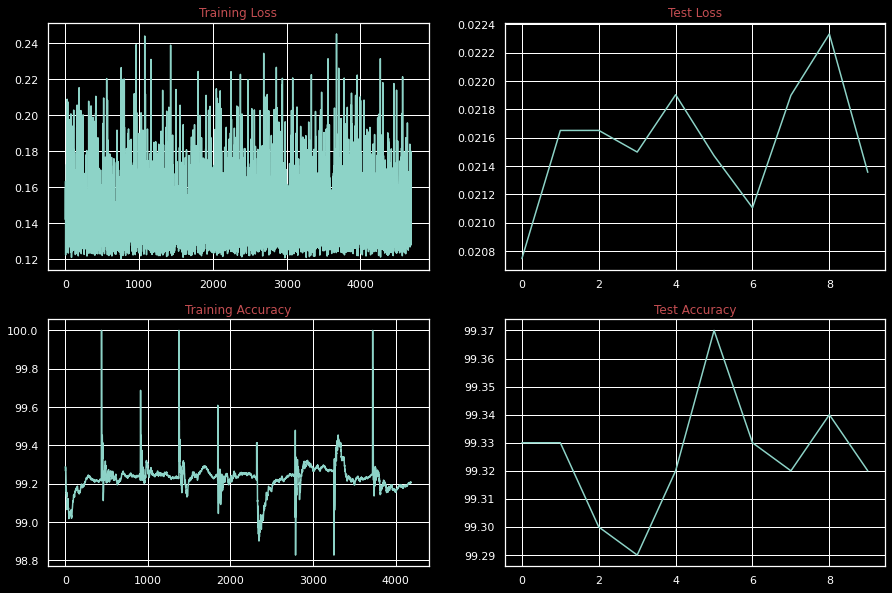

In [18]:
Plots.plot_metrics(train_metric, test_metric)

In [19]:
# L1 & L2 REgularization

exp_name = 'L1 & l2'

trainer = Test_Train.Trainer(model,device,train_loader,test_loader,optimizer,EPOCHS,scheduler)
train_metric, test_metric = trainer.train(l1_lambda=0, l2_lambda=5e-4)

# save the metrics in dictionary

metric_values[exp_name] = (train_metric, test_metric)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0
learning rate  [1.5625000000000005e-10]


Loss=0.1262863725423813 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:19<00:00, 24.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9933/10000 (99.33%)

EPOCH: 1
learning rate  [3.1250000000000007e-09]


Loss=0.18319544196128845 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:19<00:00, 23.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

EPOCH: 2
learning rate  [3.1250000000000007e-09]


Loss=0.13148903846740723 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:19<00:00, 23.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9934/10000 (99.34%)

EPOCH: 3
learning rate  [3.1250000000000007e-09]


Loss=0.16586516797542572 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:19<00:00, 23.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9928/10000 (99.28%)

EPOCH: 4
learning rate  [3.1250000000000007e-09]


Loss=0.1353808492422104 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:20<00:00, 23.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9932/10000 (99.32%)

EPOCH: 5
learning rate  [3.1250000000000007e-09]


Loss=0.1258496195077896 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:20<00:00, 22.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9935/10000 (99.35%)

EPOCH: 6
learning rate  [7.812500000000004e-12]


Loss=0.12289343774318695 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:20<00:00, 23.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9932/10000 (99.32%)

EPOCH: 7
learning rate  [1.5625000000000005e-10]


Loss=0.15744273364543915 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:19<00:00, 23.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9935/10000 (99.35%)

EPOCH: 8
learning rate  [1.5625000000000005e-10]


Loss=0.13364918529987335 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:19<00:00, 23.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9936/10000 (99.36%)

EPOCH: 9
learning rate  [1.5625000000000005e-10]


Loss=0.14213624596595764 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:20<00:00, 23.16it/s]



Test set: Average loss: 0.0222, Accuracy: 9930/10000 (99.30%)



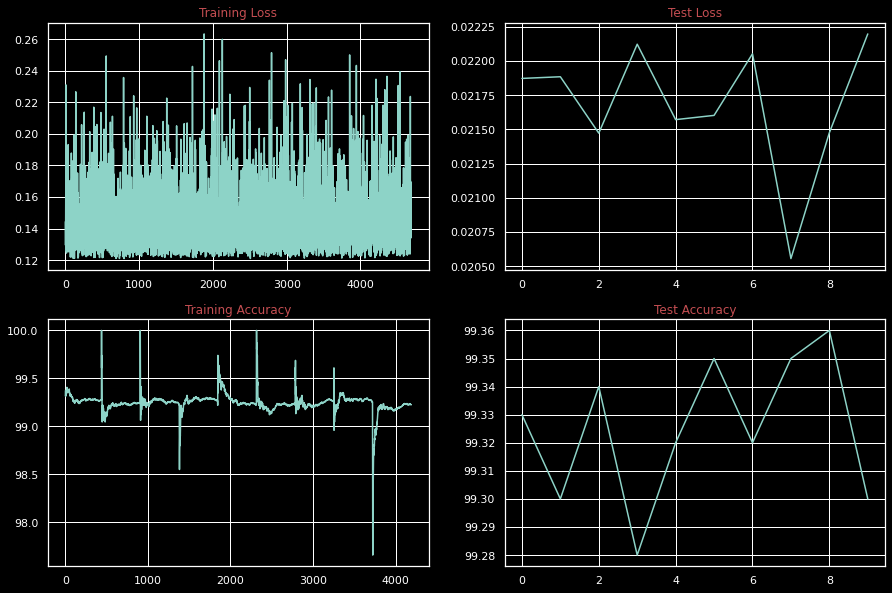

In [20]:
Plots.plot_metrics(train_metric, test_metric)

In [21]:
metric_values.keys()

dict_keys(['no-l1 & l2', 'Only l1', 'Only l2', 'L1 & l2'])

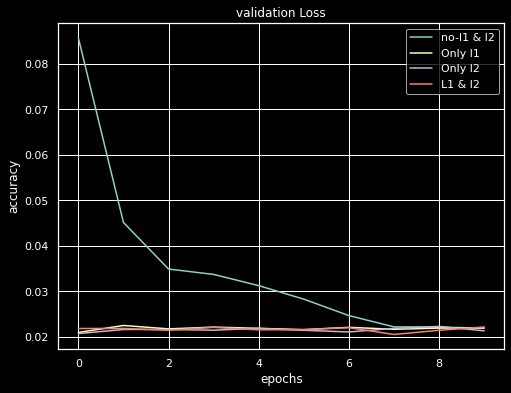

In [22]:
# plot Loss for all models

plt.figure(figsize=(8,6))
plt.title('validation Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
for idx,exp_name in enumerate(metric_values.keys()):
  train_metric,test_metric = metric_values[exp_name]
  train_acc,train_loss = train_metric
  test_acc,test_loss = test_metric
  plt.plot(test_loss,label='{}'.format(exp_name))
plt.legend()
plt.show()

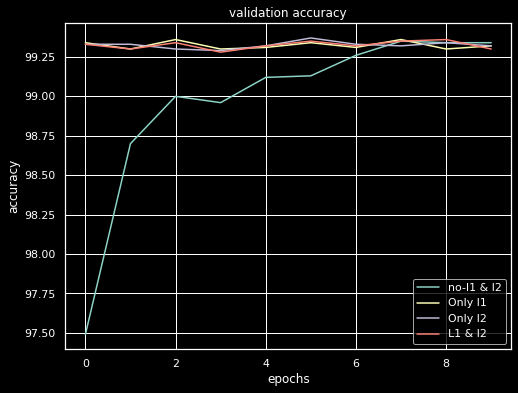

In [23]:
# plot accuracy for all models

plt.figure(figsize=(8,6))
plt.title('validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
for idx,exp_name in enumerate(metric_values.keys()):
  train_metric,test_metric = metric_values[exp_name]
  train_acc,train_loss = train_metric
  test_acc,test_loss = test_metric
  plt.plot(test_acc,label='{}'.format(exp_name))
plt.legend()
plt.show()

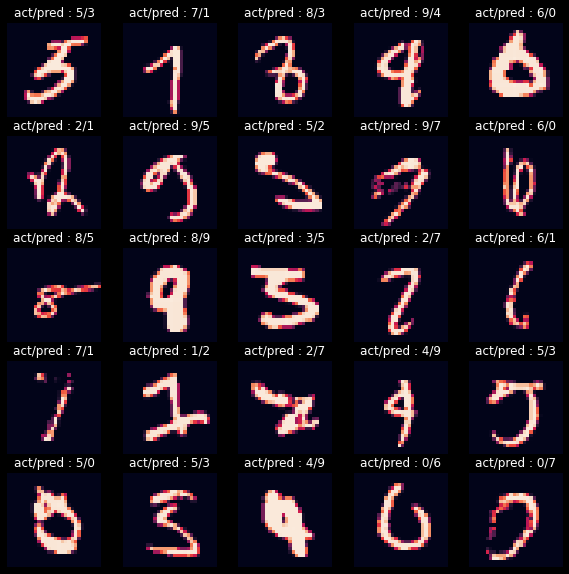

In [24]:
Plots.plot_misclassified(model,test_loader,device)